<a href="https://colab.research.google.com/github/rizkaameliads/accessibility-analysis-transjakarta/blob/main/KDE_Buffer_Accessibility_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accessibility analysis using Point Kernel Density and Buffer

#### **Installation and preparation**

This stage aims to install some uninstalled packages, call the packages to perform analysis, and connect to Drive or local disk.

In [1]:
# Install packages
!pip install geopandas
!pip install pysal

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 75.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 k

In [2]:
# Import packages
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import pysal
import seaborn

In [3]:
# Connect to drive (optional)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Step 1: Read and visualize each shapefile**

This stage aims to call each shapefile data (administration boundary, tourism object, Transjakarta shelter, and Transjakarta route) and visualize it.

In [4]:
# Read shapefile
# Administration boundary (polygon)
adminBou = gpd.read_file('/content/drive/MyDrive/GitHub Repo/Accessibility/Batas_Administrasi_DKI.shp')
# Tourism objects (point)
torsmObj = gpd.read_file('/content/drive/MyDrive/GitHub Repo/Accessibility/Objek_Wisata_DKI.shp')
# Transjakarta shelters (point)
shltrTjkt = gpd.read_file('/content/drive/MyDrive/GitHub Repo/Accessibility/Halte_Transjakarta_DKI.shp')
# Transjakarta route (line)
routeTjkt = gpd.read_file('/content/drive/MyDrive/GitHub Repo/Accessibility/Jalur_Transjakarta_DKI.shp')

In [5]:
# Show attribute info
adminBou.info()
torsmObj.info()
shltrTjkt.info()
routeTjkt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    5 non-null      int64   
 1   NAMOBJ      5 non-null      object  
 2   FCODE       5 non-null      object  
 3   REMARK      0 non-null      object  
 4   METADATA    0 non-null      object  
 5   SRS_ID      0 non-null      object  
 6   KDBBPS      0 non-null      object  
 7   KDCBPS      0 non-null      object  
 8   KDCPUM      0 non-null      object  
 9   KDEBPS      0 non-null      object  
 10  KDEPUM      0 non-null      object  
 11  KDPBPS      0 non-null      object  
 12  KDPKAB      5 non-null      object  
 13  KDPPUM      0 non-null      object  
 14  LUASWH      5 non-null      float64 
 15  TIPADM      5 non-null      int64   
 16  WADMKC      0 non-null      object  
 17  WADMKD      0 non-null      object  
 18  WADMKK      5 non-null      object  
 19  WADM

<Axes: title={'center': 'Transjakarta Route'}>

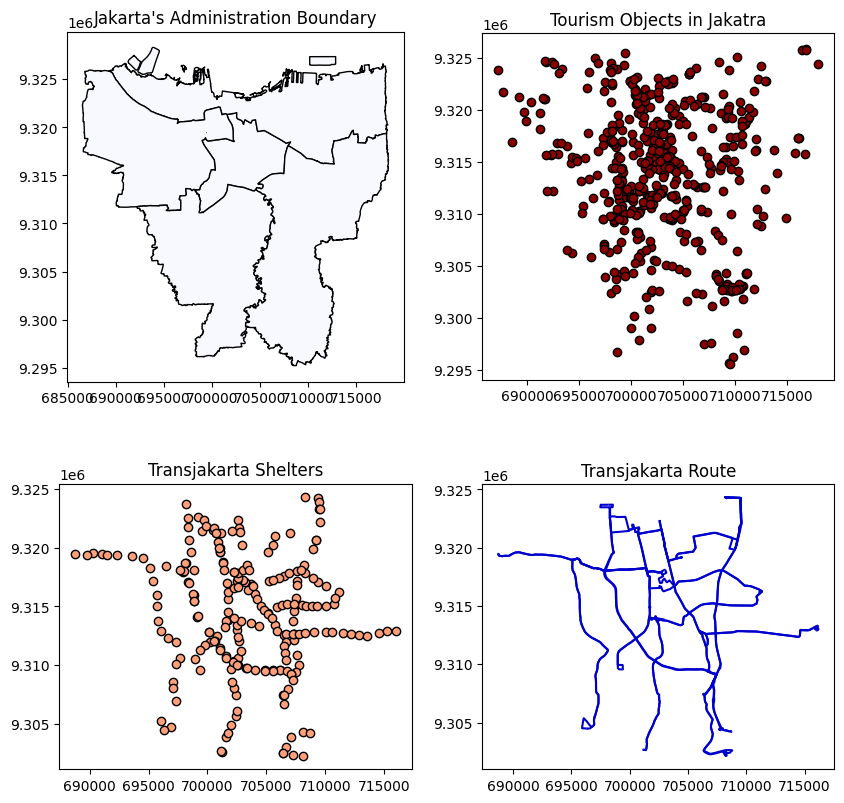

In [9]:
# Plot each shapefile
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].set_title("Jakarta's Administration Boundary")
adminBou.plot(ax=axs[0, 0], facecolor='ghostwhite', edgecolor='black')
axs[0, 1].set_title('Tourism Objects in Jakatra')
torsmObj.plot(ax=axs[0, 1], facecolor='darkred', edgecolor='black')
axs[1, 0].set_title('Transjakarta Shelters')
shltrTjkt.plot(ax=axs[1, 0], facecolor='lightsalmon', edgecolor='black')
axs[1, 1].set_title('Transjakarta Route')
routeTjkt.plot(ax=axs[1, 1], color='mediumblue')

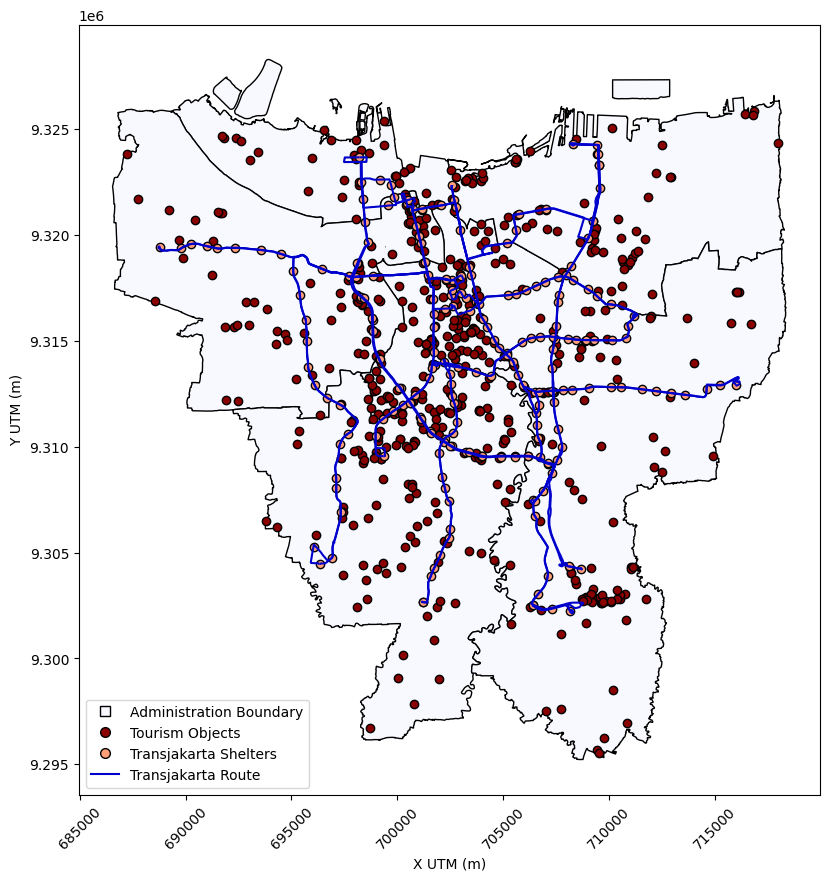

In [21]:
# Visualize all shapefiles in one frame
# Define the styles
styles = [
    {'facecolor': 'ghostwhite', 'edgecolor': 'black'},
    {'facecolor': 'darkred', 'edgecolor': 'black'},
    {'facecolor': 'lightsalmon', 'edgecolor': 'black'},
    {'color': 'mediumblue'}
]
# Plot
fig, ax = plt.subplots(figsize=(10,10))
for i, shapefile in enumerate([adminBou, torsmObj, shltrTjkt, routeTjkt]):
    shapefile.plot(ax=ax, **styles[i])
# Create legend
legendElements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='ghostwhite', markeredgecolor='black',
           markersize=7, label='Administration Boundary'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='darkred', markeredgecolor='black',
           markersize=7, label='Tourism Objects'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightsalmon', markeredgecolor='black',
           markersize=7, label='Transjakarta Shelters'),
    Line2D([0], [0], linestyle='-', color='mediumblue', label= 'Transjakarta Route')
]
# Add legend to plot
ax.legend(handles=legendElements, loc='lower left', fontsize='medium')
# Adjustment
plt.xlabel('X UTM (m)')
plt.ylabel('Y UTM (m)')
plt.xticks(rotation=45)
plt.show()

#### **Step 2: Kernel density analysis of toursim object distribution in Jakrta**

This analysis aims to acknowledge the distribution pattern of tourism objects in Jakarta.

In [22]:
# Extract the coordinates from toursim object point data
x_torsmObj = torsmObj.geometry.x
y_torsmObj = torsmObj.geometry.y

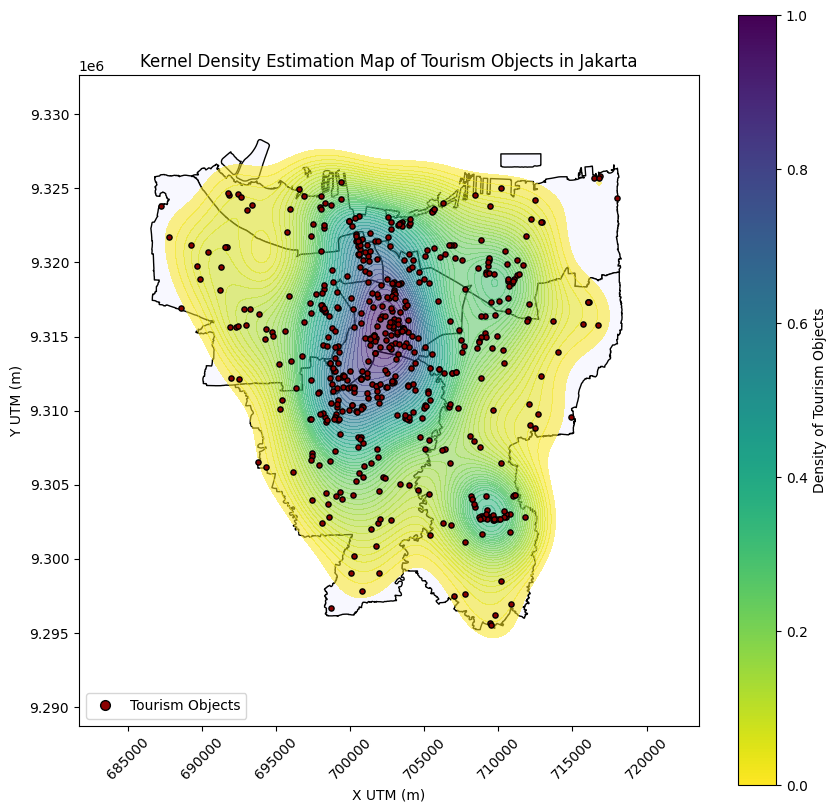

In [45]:
# Add administration boundary as base
f, ax = plt.subplots(1, figsize = (10,10))
adminBou.plot(ax=ax, facecolor='ghostwhite', edgecolor='black')
# Generate and visualize Kernel Density Estimation (KDE)
KDE_torsmObj = seaborn.kdeplot(
    x=x_torsmObj,
    y=y_torsmObj,
    data=torsmObj,
    levels=50,
    fill=True,
    alpha=0.55,
    cmap='viridis_r'
)

# Plot tourism objects on top of the KDE
torsmObj.plot(ax=ax, facecolor='darkred', edgecolor='black', markersize=14);
torsmObjLegend = Line2D([0], [0], marker='o', color='w', markerfacecolor='darkred', markeredgecolor='black',
           markersize=7, label='Tourism Objects');
# Create a ScalarMappable object for KDE colorbar
sM = plt.cm.ScalarMappable(cmap='viridis_r');
sM.set_array([]);
# Add colorbar
cbar = plt.colorbar(sM, ax=ax);
cbar.set_label('Density of Tourism Objects');
# Adjust the frame
ax.legend(handles=[torsmObjLegend], loc='lower left', fontsize='medium');
plt.title('Kernel Density Estimation Map of Tourism Objects in Jakarta');
plt.xlabel('X UTM (m)');
plt.ylabel('Y UTM (m)');
plt.xticks(rotation=45);

The density ranges from 0 to 1, with 1 ​indicating a higher probability. The map ​shows that high-probability tourism objects are clustered in Central ​Jakarta and parts of southern East ​Jakarta, indicated by dark blue to dark purple. As we ​move away from these areas, the ​probability decreases, shown by yellow. This ​indicates that most tourism objects in Jakarta are in Central Jakarta.

#### **Step 3: Buffer analysis for Transjakarta Shelter points with 1-km radius**

This analysis creates 1-km-radius buffer from each point of Transjakarta Shelters. This aims to acknowledge accessible tourism objects in Jakarta inside the radius.

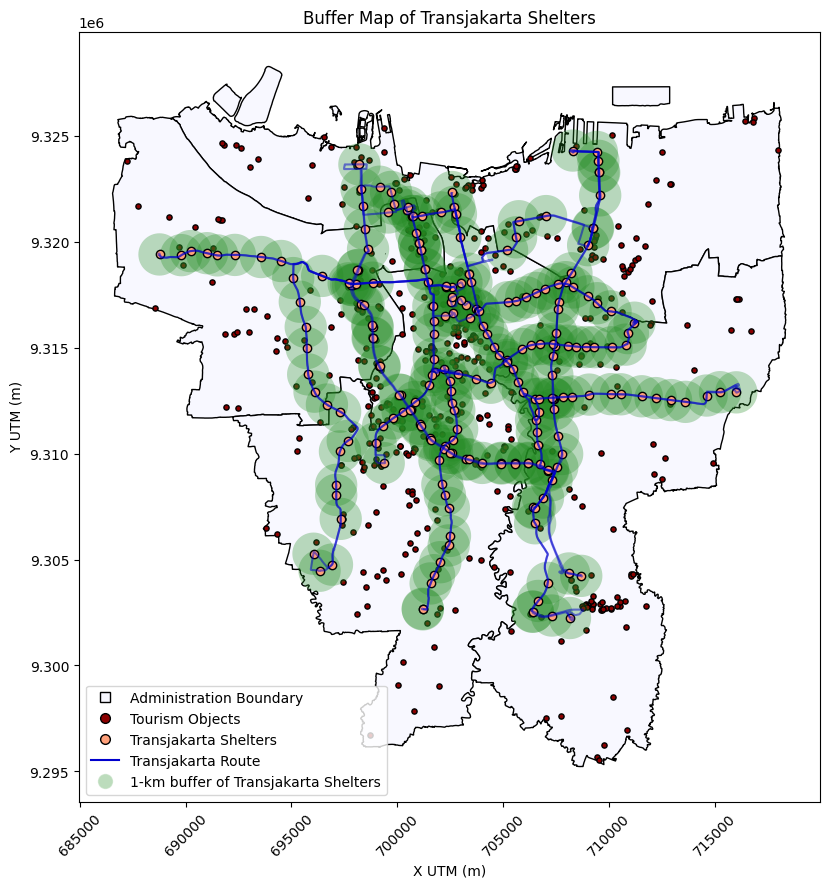

In [47]:
# Buffer analysis
bufferRadius = 1000;
shltrBuffer = shltrTjkt.buffer(bufferRadius)

# Adjust supported layers
fig, ax = plt.subplots(figsize=(10,10))
adminBou.plot(ax=ax, facecolor='ghostwhite', edgecolor='black')
routeTjkt.plot(ax=ax, color='mediumblue', alpha=0.5)
torsmObj.plot(ax=ax, facecolor='darkred', edgecolor='black', markersize=14)
# Plot the buffer
shltrBuffer.plot(ax=ax, facecolor='forestgreen', alpha=0.3)
# Plot the shelter points
shltrTjkt.plot(ax=ax, facecolor='lightsalmon', edgecolor='black')

# Create legend
legendElements2 = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='ghostwhite', markeredgecolor='black',
           markersize=7, label='Administration Boundary'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='darkred', markeredgecolor='black',
           markersize=7, label='Tourism Objects'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightsalmon', markeredgecolor='black',
           markersize=7, label='Transjakarta Shelters'),
    Line2D([0], [0], linestyle='-', color='mediumblue', label= 'Transjakarta Route'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='forestgreen',
           alpha=0.3, markersize=11, label='1-km buffer of Transjakarta Shelters')
]
# Add legend to plot
ax.legend(handles=legendElements2, loc='lower left', fontsize='medium')
plt.title('Buffer Map of Transjakarta Shelters');
plt.xlabel('X UTM (m)');
plt.ylabel('Y UTM (m)');
plt.xticks(rotation=45);
plt.show()

Based on the buffer map, many tourism objects in Jakarta fall within a 1 ​km radius of Transjakarta Shelters, ​indicating they are accessible from these ​stops. However, several destinations are ​less accessible, as they are outside the ​buffer zone. Referring to the kernel density ​estimation (KDE) map in previous figure, ​most of these less accessible destinations ​are in areas with low KDE probability, ​specifically on the outskirts of Jakarta.

#### **Step 4: Accessibility analysis**

Thi step aims to comprehend the location and the number of tourism objects that are and are not accessible from the Transjakarta Shelters using *clip()*.



In [51]:
# Clip: select tourism object points that fall inside the buffer zone
acc_torsmObj = gpd.clip(torsmObj, shltrBuffer)

In [55]:
# Count accessible and not accessible tourism objects
acc_torsmObj_count = len(acc_torsmObj)
notAcc_torsmObj_count = len(torsmObj) - acc_torsmObj_count

print(f"There are {acc_torsmObj_count} accessible Tourism Objects from Transjakarta Shelters in Jakarta,\nwhile {notAcc_torsmObj_count} objects are not accesiible.")

There are 346 accessible Tourism Objects from Transjakarta Shelters in Jakarta,
while 198 objects are not accesiible.


The results show that there are 346 points of tourism objects inside the buffer zone and 198 points outside the zone. This means, around 63.60% of tourism objects in Jakarta are accessible from the public transportation stops, which, in this case, is Transjakarta.

#### **Step 5: Final map visualization**

This last stage aims to map the tourism objest that are and are not accessible from the Transjakarta Shelters.

In [56]:
# Get the objects that are not accessible
notAcc_torsmObj = gpd.overlay(torsmObj, acc_torsmObj, how='difference')

/usr/local/lib/python3.11/dist-packages/geopandas/plotting.py:306: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  collection = ax.scatter(x, y, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)


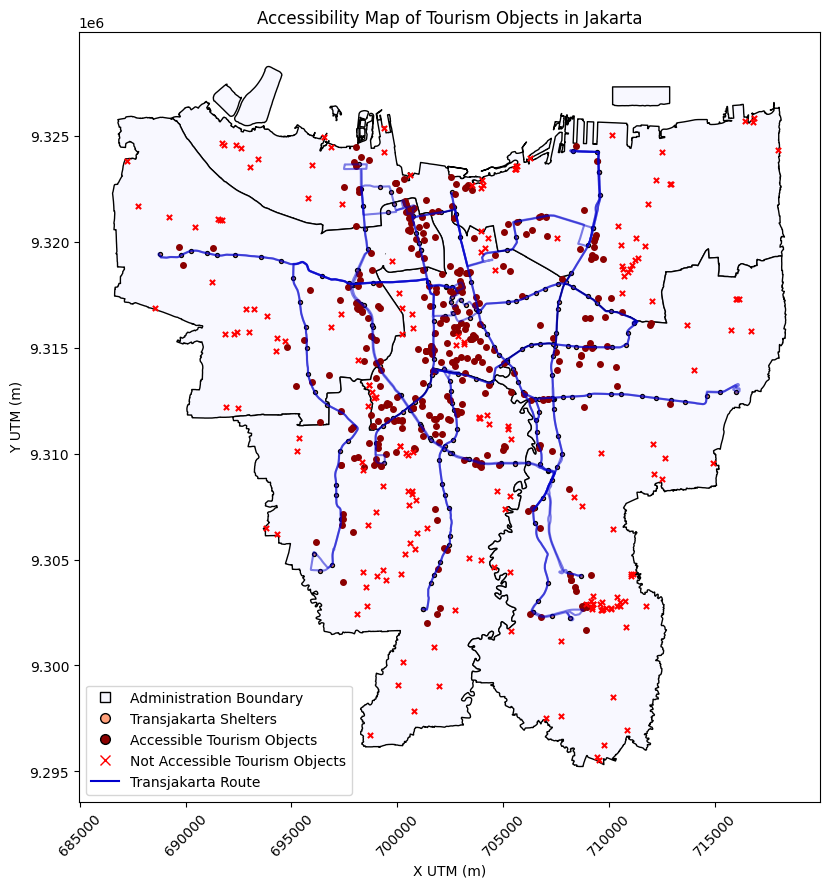

In [66]:
# Visualization
fig, ax = plt.subplots(figsize=(10,10))
adminBou.plot(ax=ax, facecolor='ghostwhite', edgecolor='black')
routeTjkt.plot(ax=ax, color='mediumblue', alpha=0.5)
shltrTjkt.plot(ax=ax, facecolor='lightsalmon', edgecolor='black', markersize=8)
acc_torsmObj.plot(ax=ax, facecolor='darkred', markersize=16)
notAcc_torsmObj.plot(ax=ax, marker='x', facecolor='red', edgecolor='red', markersize=14)

# Create legend
legendElements3 = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='ghostwhite', markeredgecolor='black',
           markersize=7, label='Administration Boundary'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightsalmon', markeredgecolor='black',
           markersize=7, label='Transjakarta Shelters'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='darkred', markeredgecolor='black',
           markersize=7, label='Accessible Tourism Objects'),
    Line2D([0], [0], marker='x', color='w',markeredgecolor='red',
       markersize=7, label='Not Accessible Tourism Objects'),
    Line2D([0], [0], linestyle='-', color='mediumblue', label= 'Transjakarta Route')
]

# Add legend to plot
ax.legend(handles=legendElements3, loc='lower left', fontsize='medium')
plt.title('Accessibility Map of Tourism Objects in Jakarta');
plt.xlabel('X UTM (m)');
plt.ylabel('Y UTM (m)');
plt.xticks(rotation=45);
plt.show()

The ​accessible destinations are shown by red ​dots with black outlines; the not accessible ​ones are shown in red x symbol.

#### **Conclusion**

We have performed point kernel density estimation and buffer analysis to map ​Transjakarta Shelters' accessibility to tourism objects in Jakarta. ​This map provides a basis for developing mass transportation, ​particularly Transjakarta, to better reach tourist spots, highlighting ​the importance of revitalizing public transportation for improved ​accessibility.